# Segmenting Data with k-Means Clustering

## Learning Objectives
The primary objective of clustering is to group items within a dataset based on similarity. **k-Means Clustering** is one of the most popular and easy to use clustering approaches. With k-Means Clustering, similarity is based on a distance metric known as euclidean distance. By the end of this tutorial, you will have learned: 
+ How to import, explore and prepare data for k-Means Clustering
+ How to segment data using k-Means Clustering
+ How to evaluate and visualize clusters
+ How to choose an appropriate number of clusters
+ How to analyze the results of k-Means Clustering

## 1. Collect the Data
Let's import and preview it:

In [1]:
import pandas as pd
customers = pd.read_csv("mallcustomers.csv")

In [2]:
customers.head()

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40


## 2. Explore the Data
Next, let's get a concise summary of the structure and the values within the dataset:

In [3]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Income         200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
customers.describe(include = 'all').round(2)

,CustomerID,Gender,Age,Income,SpendingScore
count,200.00,200,200.00,200.00,200.00
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.50,NaN,38.85,60560.00,50.20
std,57.88,NaN,13.97,26264.72,25.82
min,1.00,NaN,18.00,15000.00,1.00
25%,50.75,NaN,28.75,41500.00,34.75
50%,100.50,NaN,36.00,61500.00,50.00
75%,150.25,NaN,49.00,78000.00,73.00


In [5]:
customers.describe(include = 'all').round(2)

,CustomerID,Gender,Age,Income,SpendingScore
count,200.00,200,200.00,200.00,200.00
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.50,NaN,38.85,60560.00,50.20
std,57.88,NaN,13.97,26264.72,25.82
min,1.00,NaN,18.00,15000.00,1.00
25%,50.75,NaN,28.75,41500.00,34.75
50%,100.50,NaN,36.00,61500.00,50.00
75%,150.25,NaN,49.00,78000.00,73.00


A visual exploration of the dataset can provide us with some additional insight.

In [6]:
from matplotlib import pyplot as pyplot
import seaborn as sns
sns.set_theme()

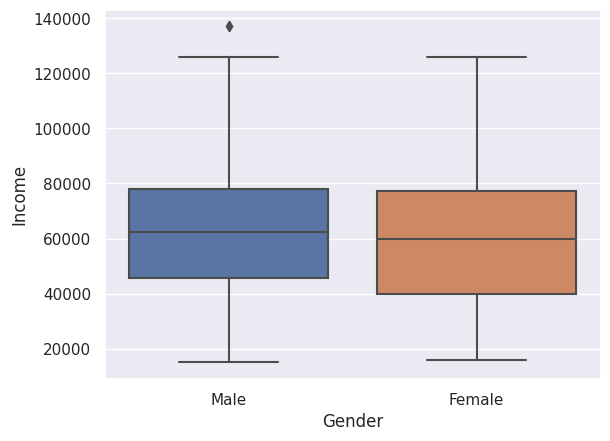

In [7]:
ax = sns.boxplot(data=customers, x='Gender', y= 'Income')

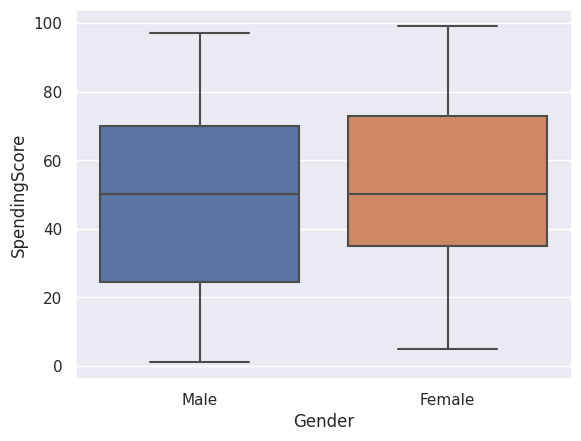

In [8]:
ax = sns.boxplot(data=customers, x='Gender', y='SpendingScore')


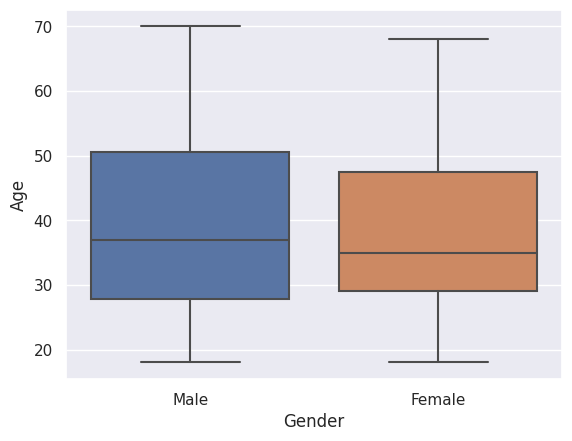

In [9]:
ax = sns.boxplot(data=customers, x='Gender', y='Age')


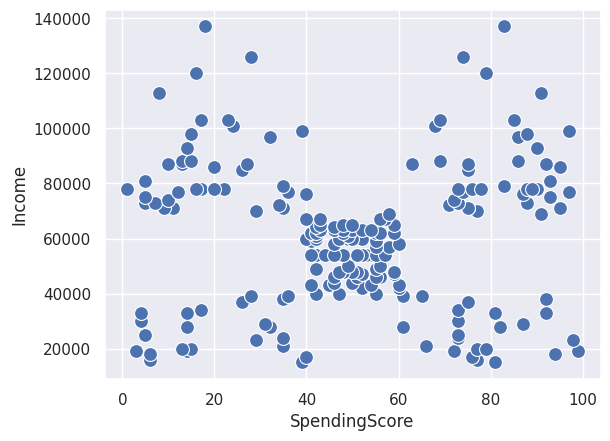

In [10]:
ax = sns.scatterplot(data= customers, x = 'SpendingScore', y="Income", s = 100)

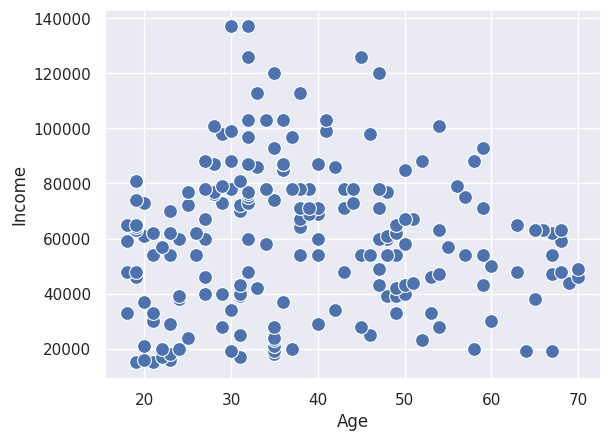

In [11]:
ax = sns.scatterplot(data = customers, 
                     x = 'Age', 
                     y = 'Income',
                     s = 100)

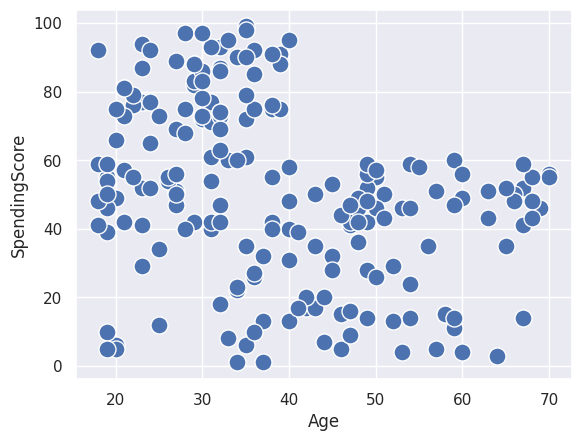

In [12]:
ax = sns.scatterplot(data = customers, 
                     x = 'Age', 
                     y = 'SpendingScore',
                     s = 150)

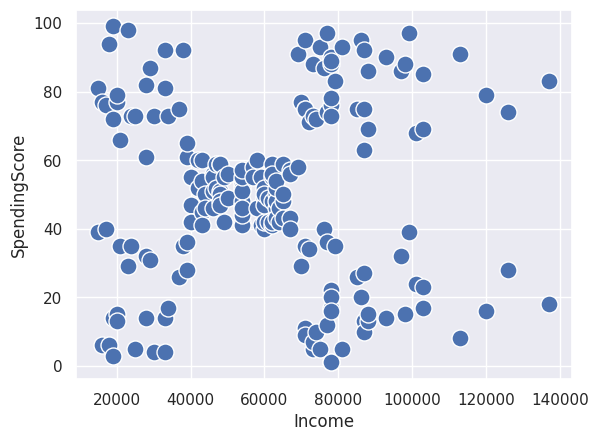

In [13]:
ax = sns.scatterplot(data = customers, 
                     x = 'Income', 
                     y = 'SpendingScore',
                     s = 150)

## 3. Prepare the Data

In [14]:
customers[['Income', 'SpendingScore']].describe().round(2)

,Income,SpendingScore
count,200.00,200.00
mean,60560.00,50.20
std,26264.72,25.82
min,15000.00,1.00
25%,41500.00,34.75
50%,61500.00,50.00
75%,78000.00,73.00
max,137000.00,99.00


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
scaler = StandardScaler()

In [18]:
customers_scaled = scaler.fit_transform(customers[['Income', "SpendingScore"]])
customers_normalized = normalizer.fit_transform(customers[['Income', "SpendingScore"]])

In [19]:
customers_scaled = pd.DataFrame(customers_scaled, columns = ['Income', 'SpendingScore'])
customers_normalized = pd.DataFrame(customers_scaled, columns=[
                                'Income', 'SpendingScore'])


In [20]:
customers_normalized.describe().round(2)


,Income,SpendingScore
count,200.00,200.00
mean,-0.00,-0.00
std,1.00,1.00
min,-1.74,-1.91
25%,-0.73,-0.60
50%,0.04,-0.01
75%,0.67,0.89
max,2.92,1.89


In [43]:
customers_scaled.describe().round(2)

,Income,SpendingScore
count,200.00,200.00
mean,-0.00,-0.00
std,1.00,1.00
min,-1.74,-1.91
25%,-0.73,-0.60
50%,0.04,-0.01
75%,0.67,0.89
max,2.92,1.89


## 3. Create the Clusters

In [44]:
from sklearn.cluster import KMeans

In [45]:
km = KMeans(n_clusters=3, n_init = 25, random_state= 1234)

In [46]:
km.fit(customers_scaled)

KMeans(n_clusters=3, n_init=25, random_state=1234)

In [47]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [48]:
km.inertia_

157.7040081503594

## 4. Evaluate and Visualize the Clusters 

In [53]:
pd.Series(km.labels_).value_counts().sort_index()

0    123
1     38
2     39
dtype: int64

In [54]:
km.cluster_centers_

array([[-0.62618966, -0.01439238],
       [ 1.00919971, -1.22553537],
       [ 0.99158305,  1.23950275]])

In [55]:
pd.DataFrame(km.cluster_centers_, columns =['Income', 'SpendingScore']).

,Income,SpendingScore
0,-0.626190,-0.014392
1,1.009200,-1.225535
2,0.991583,1.239503


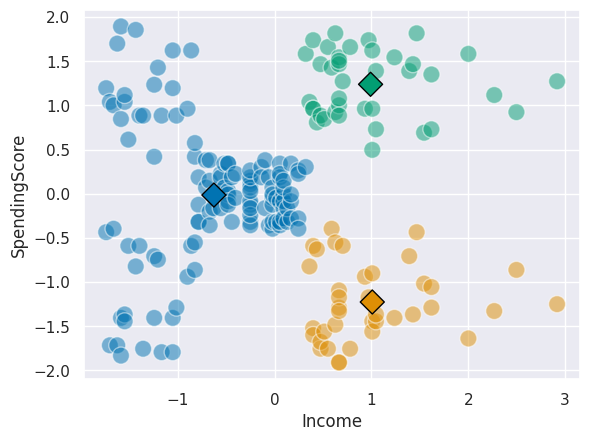

Bad pipe message: %s [b'\xcb']
Bad pipe message: %s [b'\xb8\xdb\xf0\xe7;\xd4\xb0\xd0STu\xb8\x82\xd3\xdb\xe5\xe1` u#G0\x9d\xb0\xc7H9\x04\xcbE\x96\xbc\x87\x0ee\xc1\x04\xf2\xb8m\x1bI\xf1\xc1\x14\xde\x1b\xb0\r\x13\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01']
Bad pipe message: %s [b"\x92\xde\xd0\x94\x18\x8ek!\x1e\x04qNc\x92\x86\xa1\xd0\x8f\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0\n\xc0\x14\x009\x008\xc0\t\xc0\x13\x003\x002\x00\x9d\xc0\xa1\xc0\x9d\xc0Q\x00\x9c\xc0\xa0\xc0\x9c\xc0P\x00=\x00<\x005\x00/\

In [65]:
ax = sns.scatterplot(data=customers_scaled,
                     x='Income',
                     y='SpendingScore',
                     hue=km.labels_,
                    palette='colorblind',
                     alpha=0.5,
                     s=150,
                     legend=False)
ax = sns.scatterplot(data=cluster_centers,
                     x='Income',
                     y='SpendingScore',
                     hue=cluster_centers.index,
                     palette='colorblind',
                     s=150,
                     marker='D',
                     ec='black',
                     legend=False)


In [ ]:
# Set the figure size
plt.figure(figsize=(10, 8))

#Plot the Clusters
ax = sns.scatterplot(data = customers_scaled,
                     x = 'Income',
                     y = 'SpendingScore', 
                     hue = km.labels_, 
                     palette = 'colorblind', 
                     alpha = 0.8, 
                     s = 150,
                     legend = False)

#Plot the Centroids
ax = sns.scatterplot(data = cluster_centers, 
                     x = 'Income',
                     y = 'SpendingScore', 
                     hue = cluster_centers.index, 
                     palette = 'colorblind', 
                     s = 600,
                     marker = 'D',
                     ec = 'black', 
                     legend = False)

# Add Centroid Labels
for i in range(len(cluster_centers)):
               plt.text(x = cluster_centers.Income[i], 
                        y = cluster_centers.SpendingScore[i],
                        s = i, 
                        horizontalalignment='center',
                        verticalalignment='center',
                        size = 15,
                        weight = 'bold',
                        color = 'white')

## 5. Choose the right number of Clusters

### The Within Cluster Sum of Squares (WCSS)

In [ ]:
wcss = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(customers_scaled)
    wcss.append(km.inertia_)

wcss_series = pd.Series(wcss, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = wcss_series, x = wcss_series.index)
ax = sns.scatterplot(y = wcss_series, x = wcss_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Within Cluster Sum of Squares (WCSS)')

### The Average Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

silhouette = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(customers_scaled)
    silhouette.append(silhouette_score(customers_scaled, km.labels_))

silhouette_series = pd.Series(silhouette, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = silhouette_series, x = silhouette_series.index)
ax = sns.scatterplot(y = silhouette_series, x = silhouette_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Average Silhouette Score')

### The Calinski Harabasz Score

In [ ]:
from sklearn.metrics import calinski_harabasz_score

calinski = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(customers_scaled)
    calinski.append(calinski_harabasz_score(customers_scaled, km.labels_))

calinski_series = pd.Series(calinski, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = calinski_series, x = calinski_series.index)
ax = sns.scatterplot(y = calinski_series, x = calinski_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Calinski Harabasz Score')

## 6. Analyze and Interpret the Clusters

In [ ]:
km = KMeans(n_clusters = 5, n_init = 25, random_state = 1234)
km.fit(customers_scaled)

In [ ]:
cluster_centers = pd.DataFrame(km.cluster_centers_, columns = ['Income', 'SpendingScore'])

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 8))

#Plot the Clusters
ax = sns.scatterplot(data = customers_scaled,
                     x = 'Income',
                     y = 'SpendingScore', 
                     hue = km.labels_, 
                     palette = 'colorblind', 
                     alpha = 0.8, 
                     s = 150,
                     legend = False)

#Plot the Centroids
ax = sns.scatterplot(data = cluster_centers, 
                     x = 'Income',
                     y = 'SpendingScore', 
                     hue = cluster_centers.index, 
                     palette = 'colorblind', 
                     s = 600,
                     marker = 'D',
                     ec = 'black', 
                     legend = False)


# Add Centroid Labels
for i in range(len(cluster_centers)):
               plt.text(x = cluster_centers.Income[i], 
                        y = cluster_centers.SpendingScore[i],
                        s = i, 
                        horizontalalignment='center',
                        verticalalignment='center',
                        size = 15,
                        weight = 'bold',
                        color = 'white')

In [ ]:
customers['Cluster'] = km.labels_.tolist()
customers.head(10)

In [ ]:
customers = pd.get_dummies(customers, columns = ['Gender'])
customers.head(10)

In [ ]:
customers.agg({
    'Gender_Female': 'mean',
    'Gender_Male': 'mean',
    'Age': 'median',
    'Income': 'median',
    'SpendingScore': 'median'}).round(2)

In [ ]:
customers.groupby('Cluster').agg({
    'Gender_Female': 'mean',
    'Gender_Male': 'mean',
    'Age': 'median',
    'Income': 'median',
    'SpendingScore': 'median'}).round(2)

#### What actionable insights can you come up with based on the clustering results?